# Predictive Modeling of Customer Visits Data

**Author:** ADELEYE Victor Mayowa

## Objective
The objective of this analysis is to build a predictive model to determine whether a customer will make a purchase on the website based on their visit data.

## Brief Introduction
In the digital landscape, understanding customer behavior is crucial for enhancing user experience and driving sales. By analyzing customer visit data, we can identify patterns that indicate purchase likelihood. This project utilizes a dataset comprising 12,330 sessions of customer visits to a website over a one-year period, allowing us to develop a model that predicts revenue generation.

## Dataset
The dataset consists of data points from 12,330 sessions of customer visits to the website. Each session is associated with a unique user to minimize biases related to specific campaigns, special days, user profiles, or periods.

### Attributes and Meaning

The dataset contains a total of **18 attributes**:
- **10 Numerical Attributes**
- **8 Categorical Attributes**

### Attribute Information
- **Revenue**: Class level. Possible values: **False** (did not buy) and **True** (made a purchase).
- **Administrative**: Number of administrative pages visited during the session.
- **Administrative Duration**: Total time spent on administrative pages in seconds.
- **Informational**: Number of informational pages visited during the session.
- **Informational Duration**: Total time spent on informational pages in seconds.
- **Product Related**: Number of product-related pages visited during the session.
- **Product Related Duration**: Total time spent on product-related pages in seconds.
- **Bounce Rate**: Percentage of visitors who leave the site after viewing only one page.
- **Exit Rate**: Percentage of exits on a specific page.
- **Page Value**: Average value of a web page prior to completing an e-commerce transaction.
- **Special Day**: Indicates the proximity of the visit date to a specific special day.
- **Operating System**: The operating system used by the visitor.
- **Browser**: The browser used to access the website.
- **Region**: Geographic region of the visitor.
- **Traffic Type**: Type of traffic (e.g., direct, referral).
- **Visitor Type**: Indicates whether the visitor is new or returning.
- **Weekend**: Boolean indicating whether the visit occurred on a weekend.
- **Month**: Month of the year during which the visit occurred.

## CASE STUDY
In this case study, we will build a predictive model using the customer visits data to predict whether a customer will buy a product based on their interaction with the website.


In [37]:
# IMPORT PACKAGES

# Data loadiing and EDA packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#statistical and ml model packages
import sklearn as sk
from scipy import stats
from scipy.stats import kruskal, mannwhitneyu, friedmanchisquare, f_oneway, ttest_ind,spearmanr, shapiro, levene
from sklearn.cluster import KMeans
import statsmodels.api as sm

# preprocessing packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder, StandardScaler, label_binarize
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# model packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# model evaluation packages
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import joblib

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


#### Data Loading fom UCI library

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) #pd.read_csv("online_shoppers_intention.csv") #

#### Exploration Data Analysis

In [3]:
# data (as pandas dataframes) : X as independent features, y as dependent feature also the target
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

In [4]:
type(y)

pandas.core.frame.DataFrame

In [5]:
# merge the features and target side by side for exploratin
df = pd.concat([X, y], axis=1)

In [6]:
# online_shoppers_purchasing_intention_dataset.head()
df.sample()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9669,5,64.583333,0,0.0,36,1334.083333,0.0,0.005405,0.0,0.0,Nov,2,2,3,2,Returning_Visitor,False,False


In [7]:
# df = online_shoppers_purchasing_intention_dataset.copy()

In [8]:
df_copy = df.copy()

In [9]:
# check for the 10 random samples
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5703,5,59.900000,2,8.0,84,2359.522438,0.016667,0.028710,3.478136,0.0,June,1,1,4,3,Returning_Visitor,False,False
3599,1,72.000000,0,0.0,10,343.000000,0.000000,0.020000,0.000000,0.0,May,2,2,6,1,Returning_Visitor,False,False
1446,0,0.000000,0,0.0,28,1028.116667,0.000000,0.008929,0.000000,0.0,Mar,2,4,1,2,Returning_Visitor,False,False
3514,0,0.000000,0,0.0,7,604.000000,0.000000,0.033333,53.988000,0.0,May,2,5,3,2,New_Visitor,False,True
2842,3,52.333333,5,81.5,23,541.666667,0.001111,0.047074,10.648057,0.0,May,4,1,1,4,Returning_Visitor,False,True
8778,8,260.208333,0,0.0,58,1436.690476,0.000000,0.008231,12.808191,0.0,Dec,2,2,2,1,Returning_Visitor,True,False
2879,0,0.000000,0,0.0,16,480.300000,0.012500,0.033333,0.000000,0.0,May,1,1,4,4,Returning_Visitor,True,False
10902,9,124.000000,1,61.5,25,432.166667,0.000000,0.007692,0.000000,0.0,Dec,2,2,8,2,New_Visitor,False,False
3894,0,0.000000,0,0.0,68,746.800000,0.002941,0.011471,0.000000,0.0,May,2,2,1,13,Returning_Visitor,False,False
502,18,280.950000,6,762.5,79,2096.911364,0.003333,0.014009,25.967020,0.0,Mar,2,4,2,2,Returning_Visitor,False,False


In [10]:
# Get the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

After data loading from the online repository, it was discovered that most of the categorical variables have been changed to integers i.e numerical. To convert the specified integer columns back to categorical and boolean types in a new DataFrame called df_pure, you can use the astype() method in pandas. Here's how to do it step by step:

In [11]:
df_pure = df.copy()

# Convert specified columns to categorical
df_pure['OperatingSystems'] = df_pure['OperatingSystems'].astype('category')
df_pure['Browser'] = df_pure['Browser'].astype('category')
df_pure['Region'] = df_pure['Region'].astype('category')
df_pure['TrafficType'] = df_pure['TrafficType'].astype('category')
df_pure['VisitorType'] = df_pure['VisitorType'].astype('category')
df_pure['Month'] = df_pure['Month'].astype('category')


# Check the new DataFrame and data ty
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [12]:
# Get the list of numerical columns
numerical_columns = df_pure.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

# Get the list of categorical columns
categorical_columns = df_pure.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("\nCategorical Columns:\n", categorical_columns)

Numerical Columns:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

Categorical Columns:
 ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [13]:
# Display descriptive statistics for numerical columns
df_pure[numerical_columns].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [14]:
df_pure[categorical_columns].describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [15]:
missing_values=df.isnull().sum()
missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Customer Segmentation

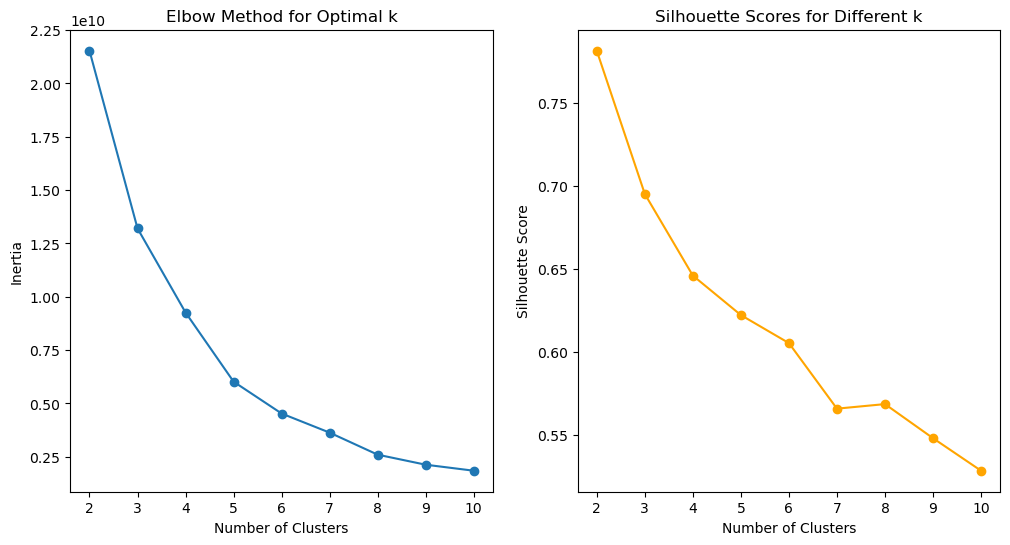

In [16]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Selecting relevant features for clustering
features = df[['Administrative_Duration','Informational_Duration', 'ProductRelated_Duration',
                'ExitRates', 'PageValues', 'SpecialDay']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


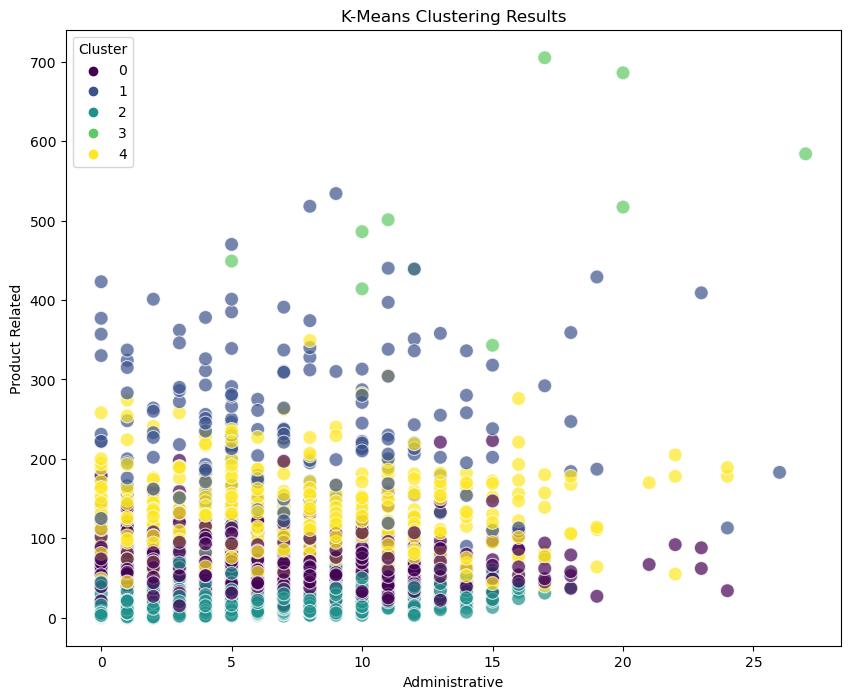

In [17]:
# Choose the number of clusters based on the elbow method or silhouette score
optimal_clusters = 5  # Adjust based on your analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(features)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Administrative', y='ProductRelated', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering Results')
plt.xlabel('Administrative')
plt.ylabel('Product Related')
plt.legend(title='Cluster')
plt.show()

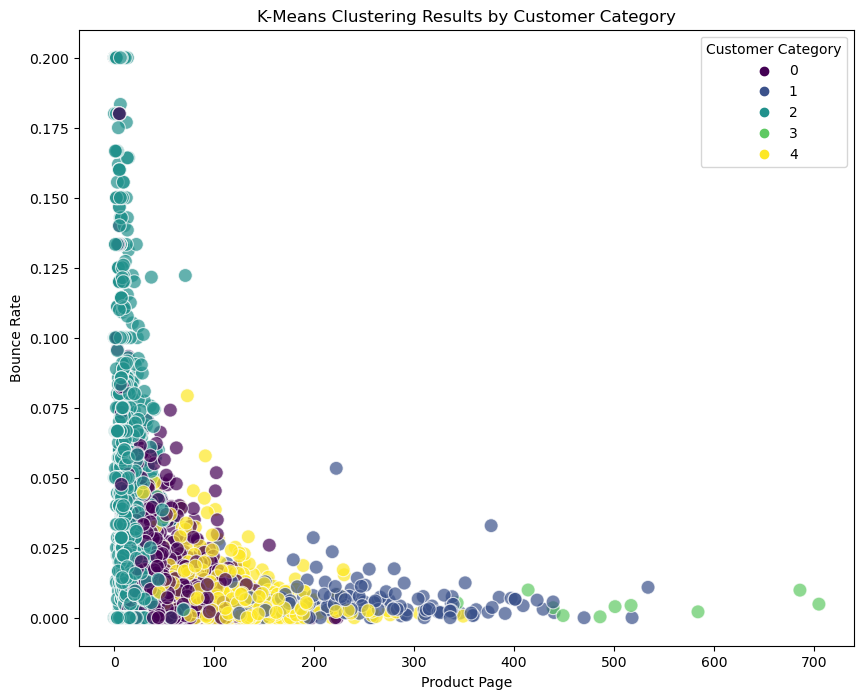

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ProductRelated', y='BounceRates', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering Results by Customer Category')
plt.xlabel('Product Page')
plt.ylabel('Bounce Rate')
plt.legend(title='Customer Category')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Preprocessing

In [20]:
df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [21]:
df_pure.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [22]:
df_copy = df_pure.copy()

In [23]:
#Label Encoding
le = LabelEncoder()
df_copy['Revenue'] = le.fit_transform(df_copy['Revenue'])
df_copy['TrafficType'] = le.fit_transform(df_copy['TrafficType'])
df_copy['Month'] = le.fit_transform(df_copy['Month'])
df_copy['Browser'] = le.fit_transform(df_copy['Browser'])

In [24]:
df_pure.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [25]:
df_copy['Month'].value_counts()

Month
6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: count, dtype: int64

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  int32   
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  int64   
 13  Region                   12330 non-null  category
 14  Traffi

Preprocessing Steps
* Make a copy of the data
* Label Encodeing - Traffictype, BrowserType and Month are label encoded because high cardinality tendencies
* One hot encoding - the other categorical variable
* Pipeline for Hybrid sampling - SMOTE 60% oversampling and 80% undersampling according to the paper.
* MinMax Scaling numerical varibles because of the fact that most of the columns do not follow normal distribution upon visual inspection of distribution.
* Data Splitting

In [28]:
# one hot encoding
data1 = pd.get_dummies(df_copy)
data1.columns
#Remember: to Smote

print(df_copy['Revenue'].value_counts())
# getting dependent and independent variables
x=data1
# removing the target column revenue from
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue']
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Revenue
0    10422
1     1908
Name: count, dtype: int64
Shape of x: (12330, 34)
Shape of y: (12330,)


### Data Splitting

In [29]:
y.value_counts()

Revenue
0    10422
1     1908
Name: count, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# checking the shape
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 34)
Shape of y_train : (8631,)
Shape of x_test : (3699, 34)
Shape of y_test : (3699,)


In [31]:
y_train.value_counts()

Revenue
0    7345
1    1286
Name: count, dtype: int64

In [32]:
numerical_columns

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

### Numerical Data Transformation

In [33]:

# 3. Min-Max scale numerical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', numerical_transformer, numerical_columns)
    ]
)

In [35]:
# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

###  Model Evaluation

In [38]:
def load_and_evaluate_model(model_path, X_test, y_test, class_names=None):
    """
    Loads a joblib model, evaluates it on test data, and plots evaluation metrics.
    
    Parameters:
    - model_path (str): Path to the joblib model file.
    - X_test (array-like): Test features.
    - y_test (array-like): True labels for the test set.
    - class_names (list, optional): List of class names for the confusion matrix.
    
    Returns:
    - None (prints evaluation metrics and displays plots).
    """
    
    # Load the model
    model = joblib.load(model_path)
    print(f"Model loaded from {model_path}")
    
    # Predict the test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    # Return metrics (optional for further analysis)
    return {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    }

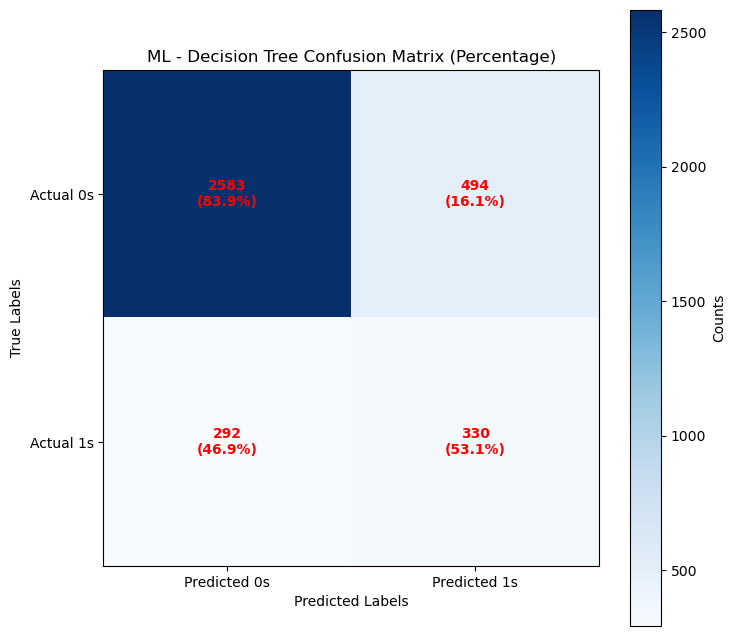

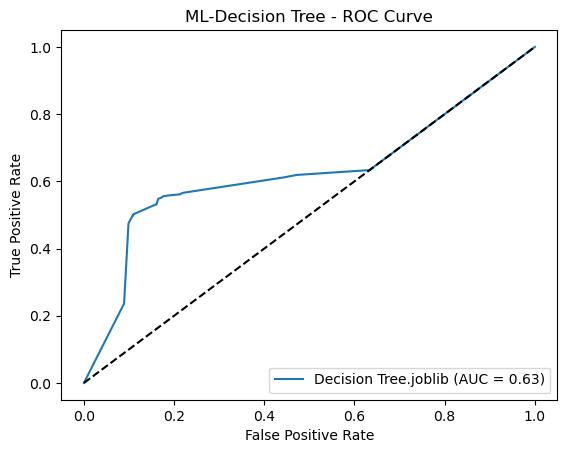

Decision Tree.joblib - Accuracy: 0.79, AUC-ROC: 0.63
              precision    recall  f1-score   support

       False       0.90      0.84      0.87      3077
        True       0.40      0.53      0.46       622

    accuracy                           0.79      3699
   macro avg       0.65      0.69      0.66      3699
weighted avg       0.81      0.79      0.80      3699

Error loadingmodel_without_boxcox\Gradient Boost.joblib with joblib. Attempting alternative loading methods...


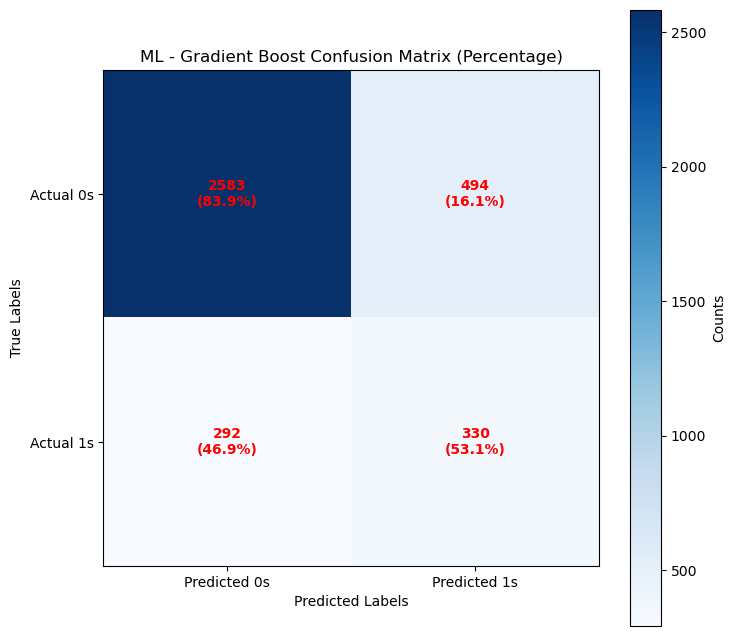

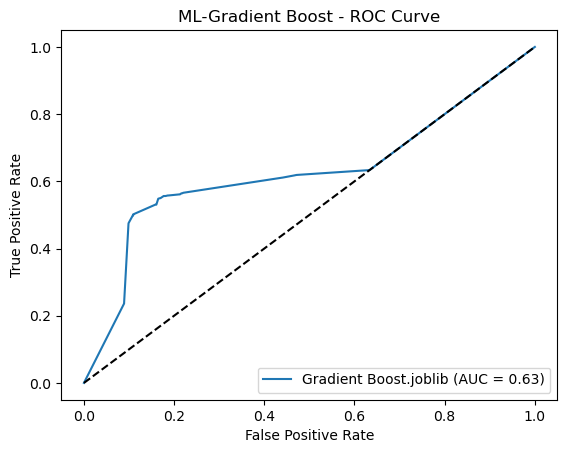

Gradient Boost.joblib - Accuracy: 0.79, AUC-ROC: 0.63
              precision    recall  f1-score   support

       False       0.90      0.84      0.87      3077
        True       0.40      0.53      0.46       622

    accuracy                           0.79      3699
   macro avg       0.65      0.69      0.66      3699
weighted avg       0.81      0.79      0.80      3699



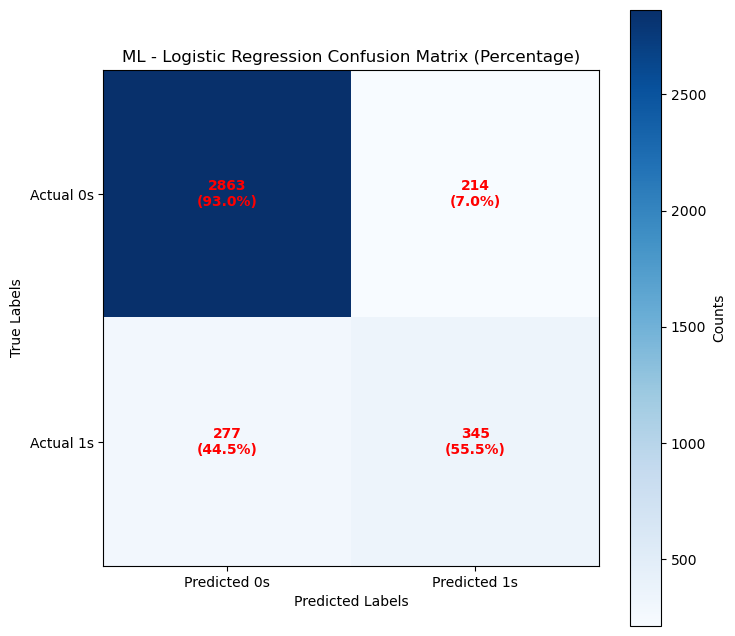

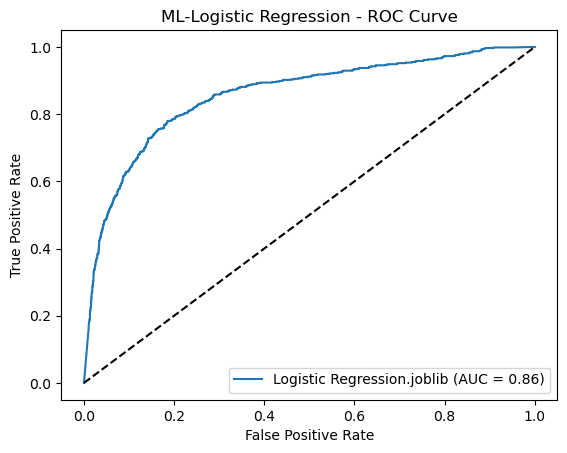

Logistic Regression.joblib - Accuracy: 0.87, AUC-ROC: 0.86
              precision    recall  f1-score   support

       False       0.91      0.93      0.92      3077
        True       0.62      0.55      0.58       622

    accuracy                           0.87      3699
   macro avg       0.76      0.74      0.75      3699
weighted avg       0.86      0.87      0.86      3699



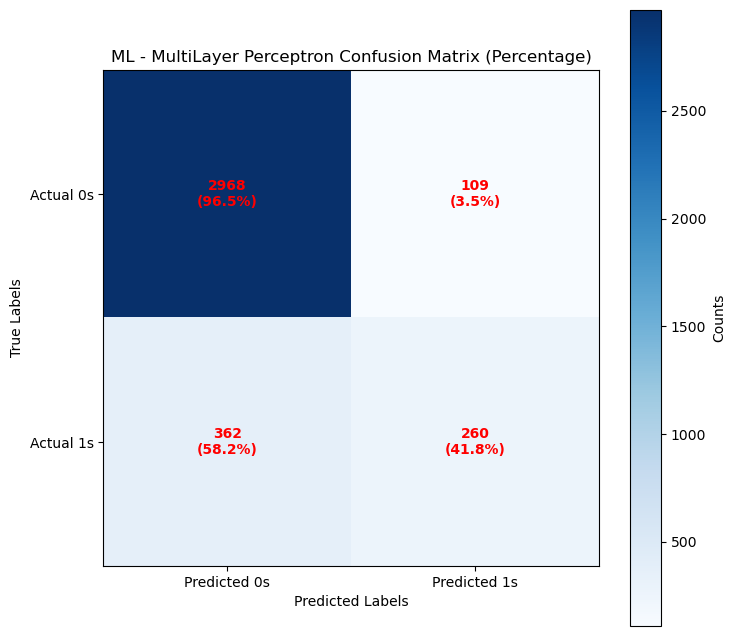

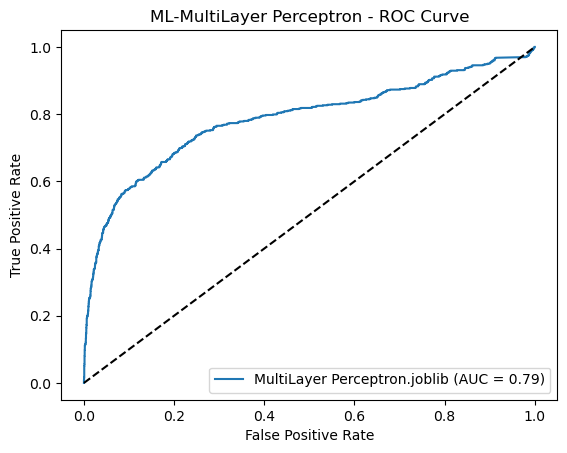

MultiLayer Perceptron.joblib - Accuracy: 0.87, AUC-ROC: 0.79
              precision    recall  f1-score   support

       False       0.89      0.96      0.93      3077
        True       0.70      0.42      0.52       622

    accuracy                           0.87      3699
   macro avg       0.80      0.69      0.73      3699
weighted avg       0.86      0.87      0.86      3699



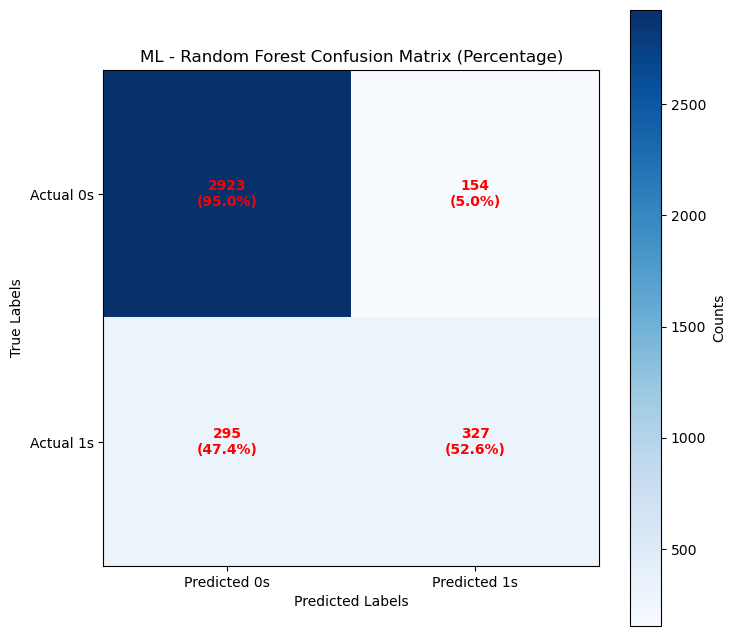

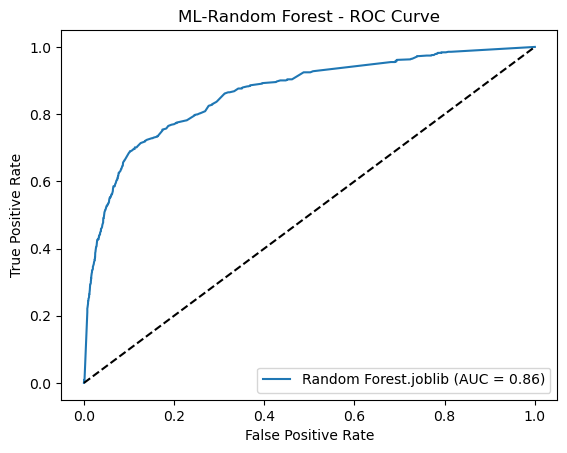

Random Forest.joblib - Accuracy: 0.88, AUC-ROC: 0.86
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      3077
        True       0.68      0.53      0.59       622

    accuracy                           0.88      3699
   macro avg       0.79      0.74      0.76      3699
weighted avg       0.87      0.88      0.87      3699



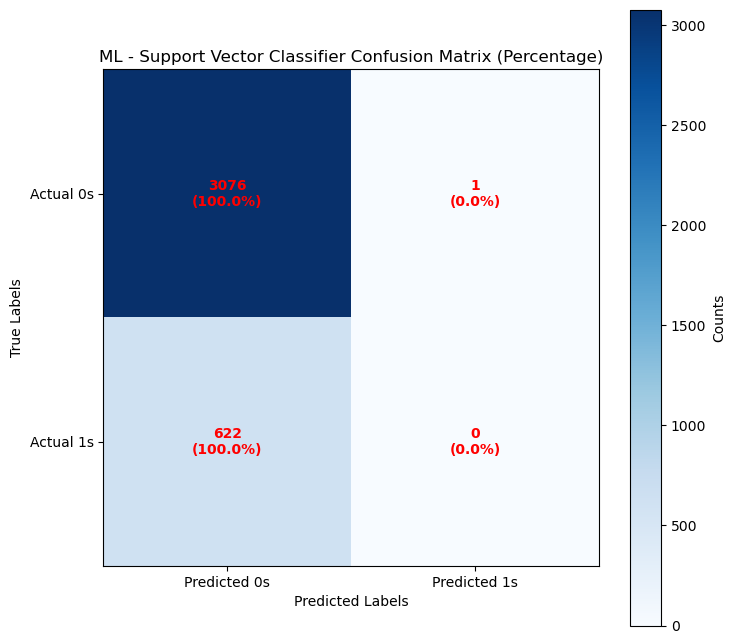

Support Vector Classifier.joblib - Accuracy: 0.83
              precision    recall  f1-score   support

       False       0.83      1.00      0.91      3077
        True       0.00      0.00      0.00       622

    accuracy                           0.83      3699
   macro avg       0.42      0.50      0.45      3699
weighted avg       0.69      0.83      0.76      3699



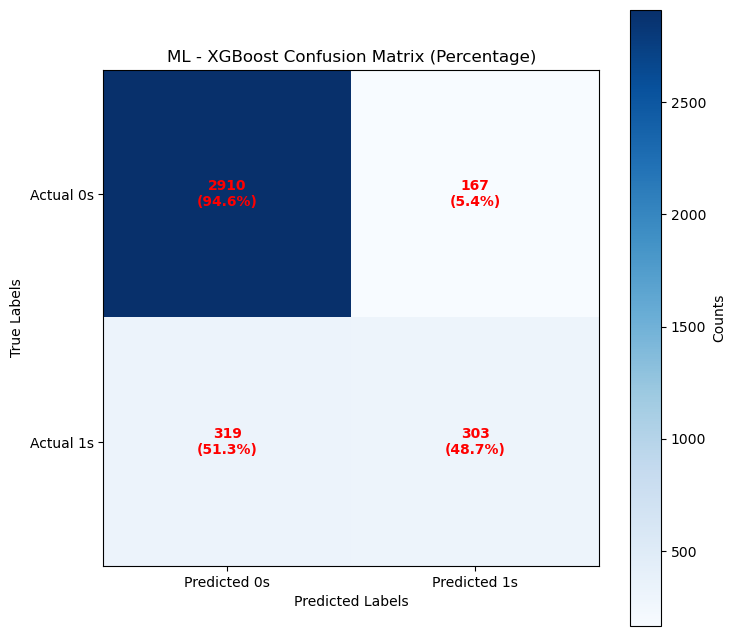

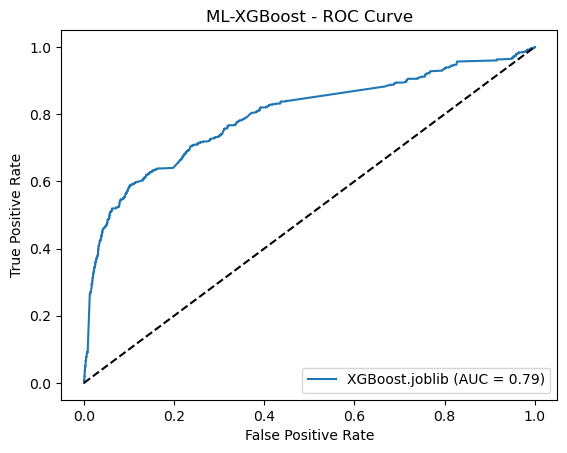

XGBoost.joblib - Accuracy: 0.87, AUC-ROC: 0.79
              precision    recall  f1-score   support

       False       0.90      0.95      0.92      3077
        True       0.64      0.49      0.55       622

    accuracy                           0.87      3699
   macro avg       0.77      0.72      0.74      3699
weighted avg       0.86      0.87      0.86      3699


Model Comparison Table:
  Group                      Model  Accuracy  Precision    Recall   AUC-ROC
0    ML              Decision Tree  0.787510   0.649460  0.685000  0.628299
1    ML             Gradient Boost  0.787510   0.649460  0.685000  0.628299
2    ML        Logistic Regression  0.867261   0.764478  0.742557  0.857241
3    ML      MultiLayer Perceptron  0.872668   0.797949  0.691291  0.785964
4    ML              Random Forest  0.878616   0.794081  0.737837  0.863336
5    ML  Support Vector Classifier  0.831576   0.415900  0.499838       NaN
6    ML                    XGBoost  0.868613   0.772944  0.716432  0.

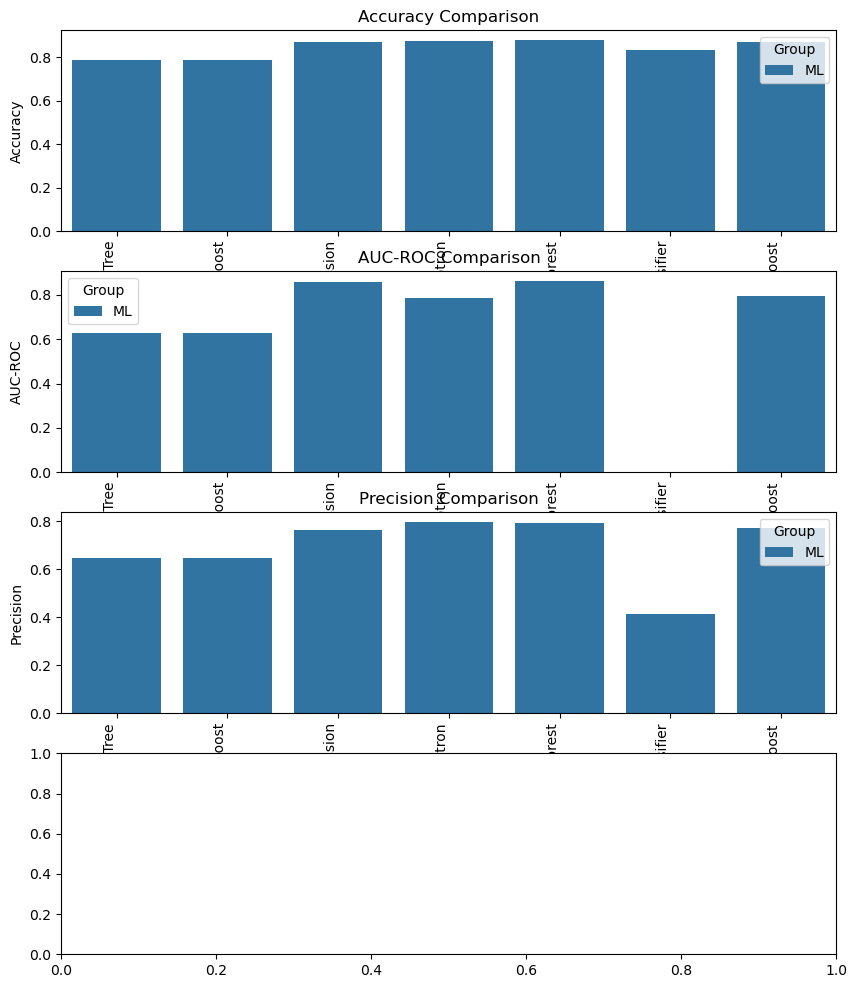

In [59]:
import joblib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize

# Define paths to model directories
group_dirs = {
    'ML': 'model_without_boxcox',  # MinMaxScaler, no Boxcox
    #'StandardScaler, no Boxcox': 'model_box_cox/',  # StandardScaler, no Boxcox
    #'Group3': ' StandardScaler, Boxcox'   # StandardScaler, Boxcox
}

# Placeholder for model evaluation results
results = []

def load_and_evaluate_models(group_name, group_path, X_test, y_test, class_names=None):
    group_results = []
    
    for model_file in os.listdir(group_path):
        if model_file.endswith('.joblib'):
            model_path = os.path.join(group_path, model_file)
            model_name, _ = os.path.splitext(model_file)
            try:
                model = joblib.load(model_path)
            except ModuleNotFoundError as e:
                if "_loss" in str(e):
                    # Load using XGBoost-specific method or recreate the model configuration
                    print(f"Error loading{model_path} with joblib. Attempting alternative loading methods...")
                    # Your alternative handling code here, if applicable
                else:
                    raise e
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            # Calculate metrics
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')
            report = classification_report(y_test, y_pred, output_dict=True)
            conf_matrix = confusion_matrix(y_test, y_pred)
            try:
                y_prob = model.predict_proba(X_test)[:, 1]
                auc_roc = roc_auc_score(y_test, y_prob)
                fpr, tpr, _ = roc_curve(y_test, y_prob)
            except AttributeError:  # If model does not support predict_proba
                auc_roc, fpr, tpr = None, None, None

            # Append results for the table
            group_results.append({
                'Group': group_name,
                'Model': model_file.split('.')[0],
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'AUC-ROC': auc_roc
            })

            
            # Calculate the confusion matrix
            cm = confusion_matrix(y_test, y_pred)

            # Normalize the confusion matrix to get percentages
            cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

            # Create the plot
            fig, ax = plt.subplots(figsize=(8, 8))
            cax = ax.imshow(cm, cmap='Blues')
            ax.set_title(f'{group_name} - {model_name} Confusion Matrix (Percentage)')
            ax.set_xlabel('Predicted Labels')
            ax.set_ylabel('True Labels')
            ax.xaxis.set(ticks=[0, 1], ticklabels=['Predicted 0s', 'Predicted 1s'])
            ax.yaxis.set(ticks=[0, 1], ticklabels=['Actual 0s', 'Actual 1s'])
            ax.set_ylim(1.5, -0.5)  # Invert y-axis to have the top label on top

            # Annotate each cell with the numeric value and the percentage
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    count = cm[i, j]
                    percentage = cm_normalized[i, j]
                    ax.text(j, i, f'{count}\n({percentage:.1f}%)', ha='center', va='center', color='red',  fontweight='bold')

            # Add color bar
            plt.colorbar(cax, ax=ax, format='%.0f', label='Counts')
            # Save the figure in PNG format
            plt.savefig(f'{group_name}_{model_name}_confusion_matrix.png', format='png', bbox_inches='tight')
            plt.show()

            # Plot ROC curve if available
            if auc_roc is not None:
                plt.figure()
                plt.plot(fpr, tpr, label=f'{model_file} (AUC = {auc_roc:.2f})')
                plt.plot([0, 1], [0, 1], 'k--')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'{group_name}-{model_name} - ROC Curve')
                plt.legend(loc='lower right')
                # Save the figure in PNG format
                plt.savefig(f'{group_name}_{model_name}_ROC.png', format='png', bbox_inches='tight')
                plt.show()
                
            print(f"{model_file} - Accuracy: {accuracy:.2f}, AUC-ROC: {auc_roc:.2f}" if auc_roc is not None else f"{model_file} - Accuracy: {accuracy:.2f}")
            print(classification_report(y_test, y_pred, target_names=class_names))

    return group_results

# Load and evaluate each group
for group_name, group_path in group_dirs.items():
    group_results = load_and_evaluate_models(group_name, group_path, X_test_transformed, y_test, class_names=['False', 'True'])
    results.extend(group_results)

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)
# results_df.to_csv('minmax_comparison_results.csv', index=False)
print("\nModel Comparison Table:")
print(results_df)

# Plot comparison of accuracy and AUC-ROC across models
fig, axes = plt.subplots(4, 1, figsize=(10, 12))  # Increased figure size for better readability

# Accuracy plot
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Group', ax=axes[0])
axes[0].set_title('Accuracy Comparison')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Save Accuracy plot
plt.savefig('accuracy_comparison.png', format='png', bbox_inches='tight')


# AUC-ROC plot
sns.barplot(data=results_df, x='Model', y='AUC-ROC', hue='Group', ax=axes[1])
axes[1].set_title('AUC-ROC Comparison')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')

# Save AUC-ROC plot
plt.savefig('auc_roc_comparison.png', format='png', bbox_inches='tight')


# Precision plot
sns.barplot(data=results_df, x='Model', y='Precision', hue='Group', ax=axes[2])
axes[2].set_title('Precision Comparison')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90, ha='right')

# Save Precision plot
plt.savefig('precision_comparison.png', format='png', bbox_inches='tight')
# plt.show()  # Clear the current figure